# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 70 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 50 баллов
* Задача 5 &mdash; 30 балла


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов.

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$.

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.



*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. Формулами мат. ожидания и дисперсии с занятия пользоваться нельзя, но стоит сверить ответ.
2. **Прочитай требования к формату решения в правилах сдачи задания.**

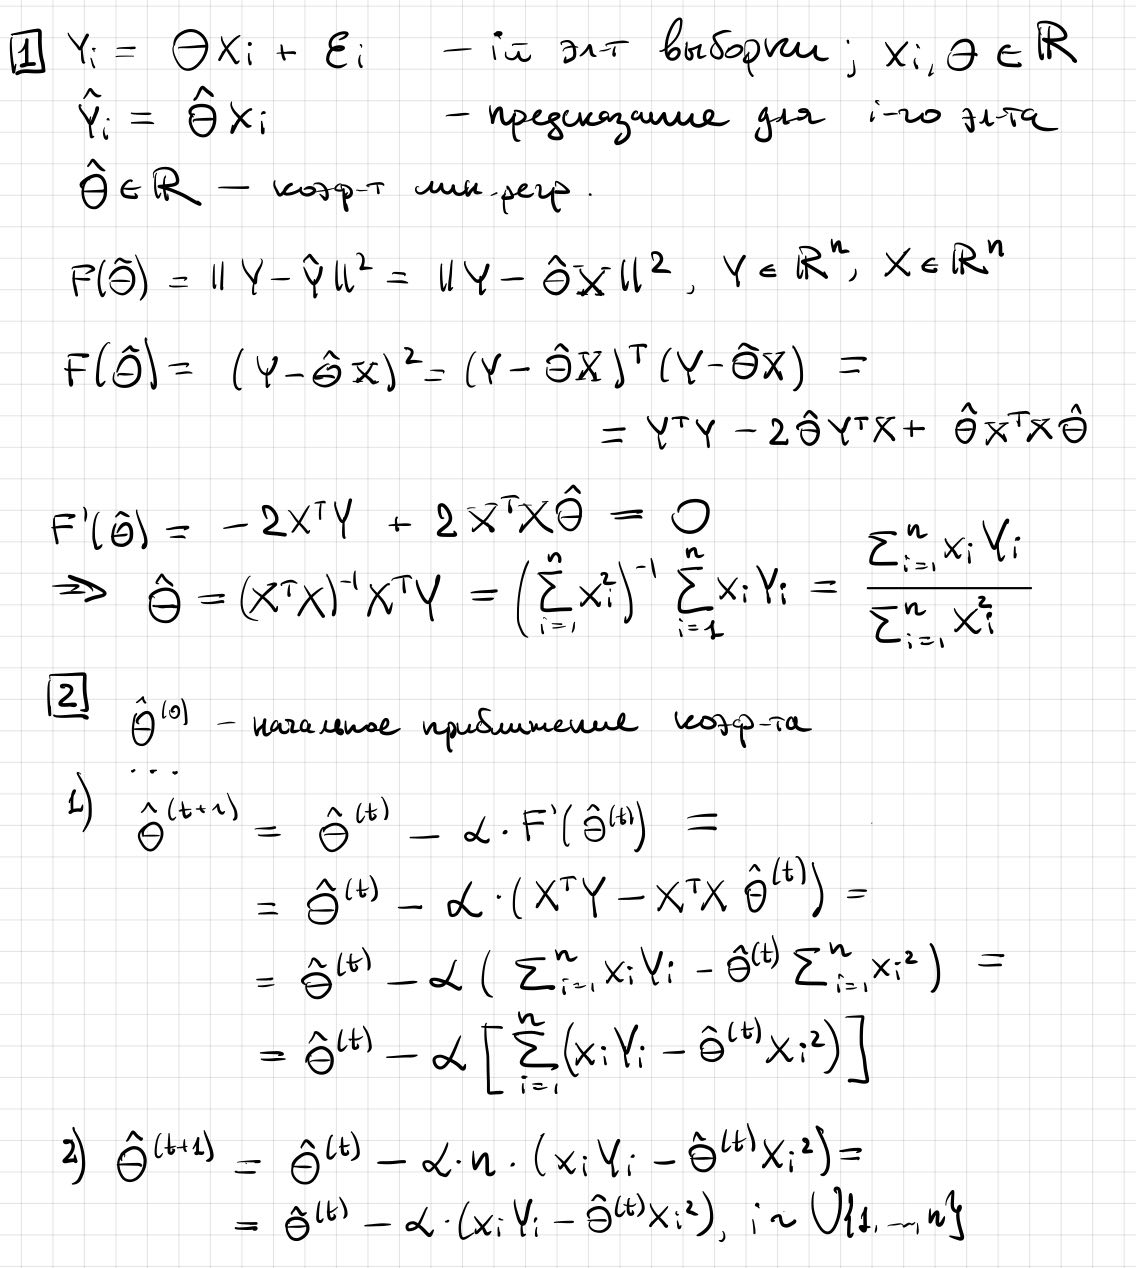

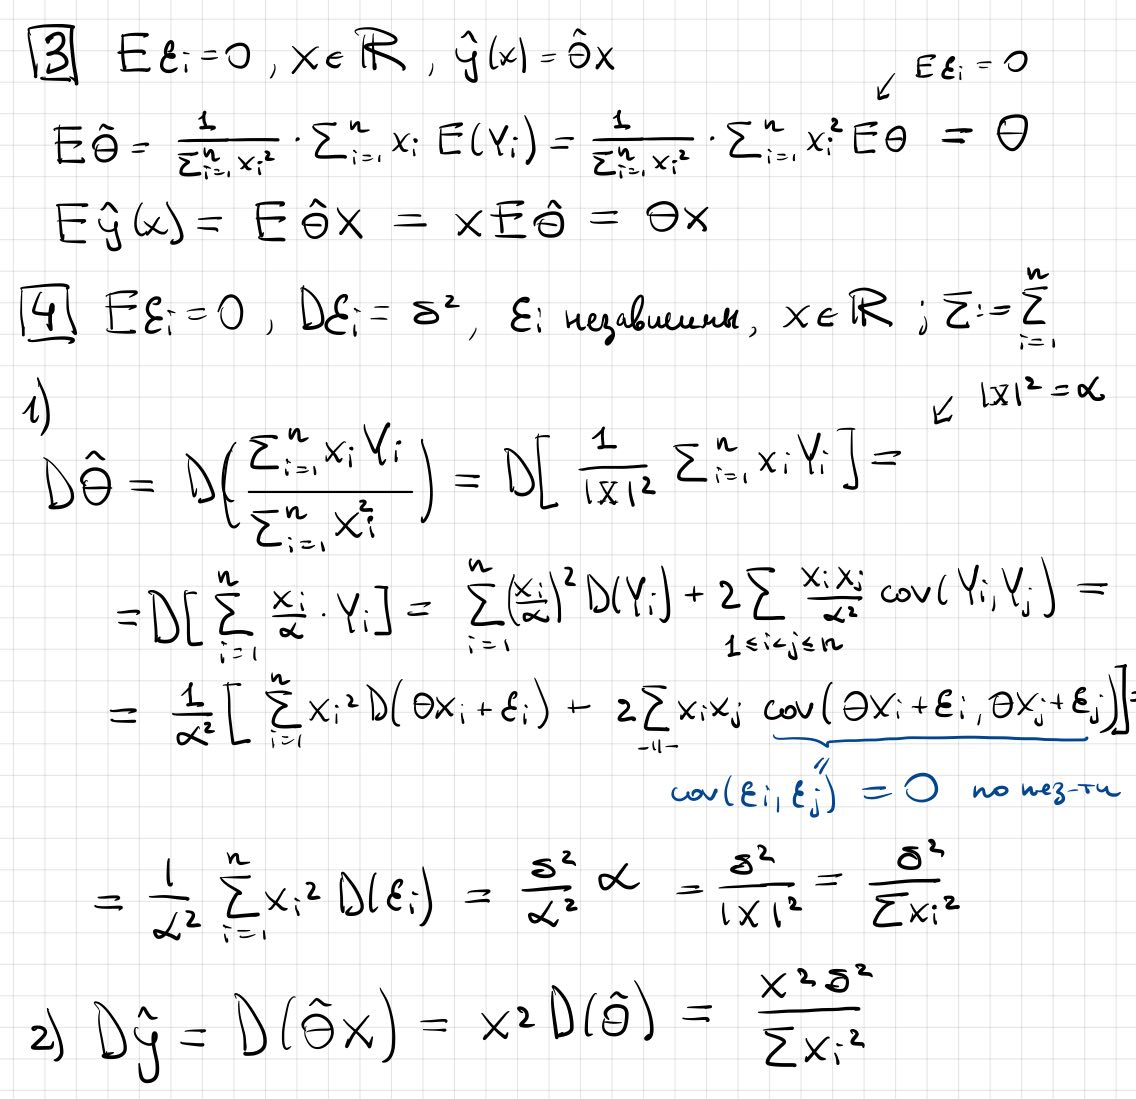

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

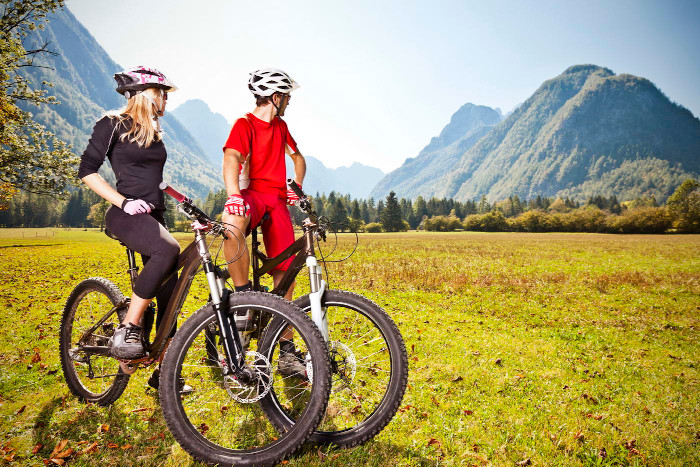

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; весна, 2 &mdash; лето, 3 &mdash; осень, 4 &mdash; зима;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [5]:
df = pd.read_csv("day.csv")
df = df.drop(columns=["instant", "dteday", "registered", "casual", "yr"])

In [24]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1337)

In [162]:
df = df_train

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. 

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

Хотим посмотреть на зависимости таргета от признаков и, возможно, понять тип зависимости. Для этого нужен scatterplot:

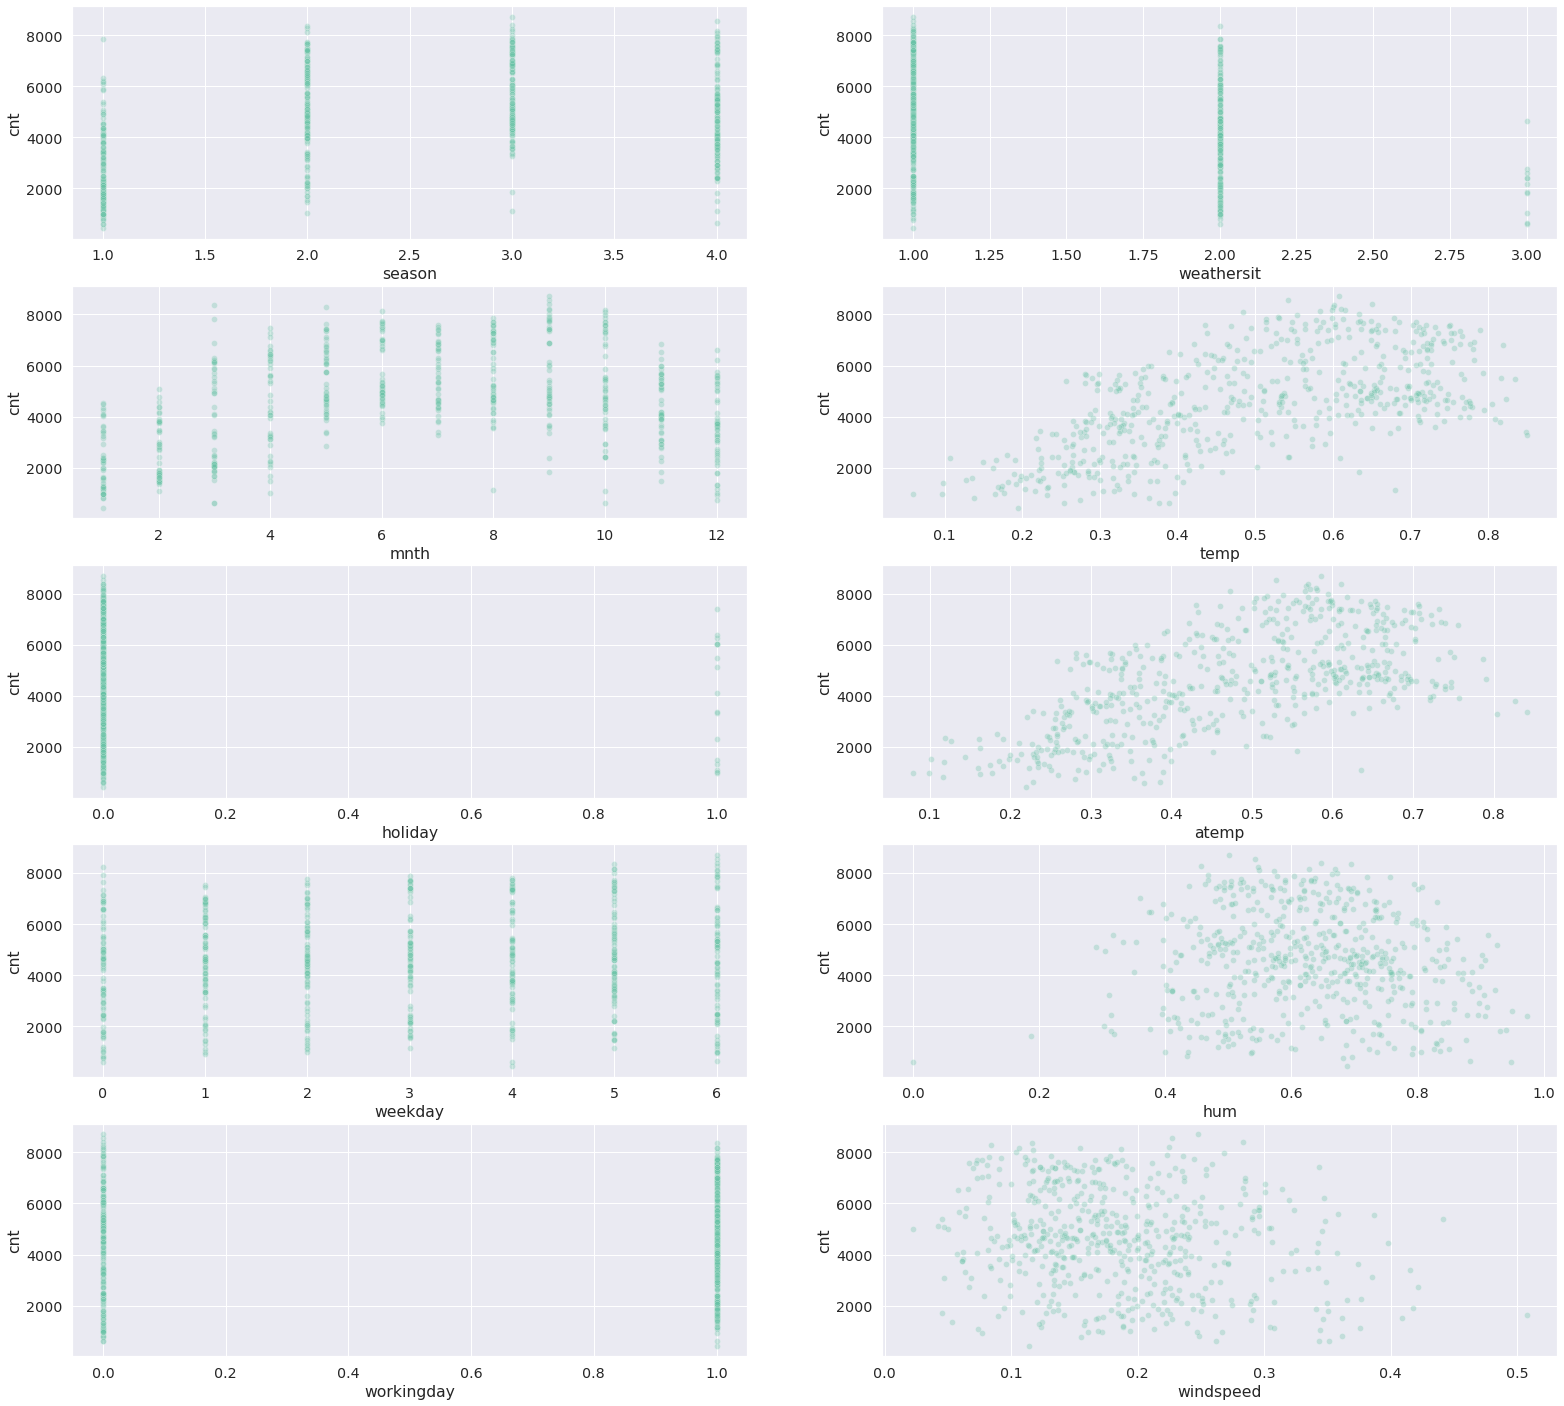

In [27]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))
plt.subplots_adjust(right=1.5, top=2)
for idx, ft in enumerate(df.columns):
    if ft != "cnt":
        sns.scatterplot(data=df, x=ft, y="cnt", ax=axes[idx % 5][idx // 5], alpha=0.3)

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**

- Выбросы есть, например, на графике зависимости таргета от скорости ветра, влажности, temp, atemp, etc.
- $x^2$ подойдет для описания зависимости таргета от месяца/сезона, сдвинутый логарифм можно использовать для temp/atemp (хотя в принципе тут можно оставить как есть, линейная зависимость тоже неплохо апроксимирует распределение), индикатор $I\{x > 2\}$ отображает то, что в плохую погоду велосипеды берут сильно реже, чем в хорошую. 
- Сезон дублирует месяц, оставим что-нибудь одно (глобально ценнее информация о сезоне)
- workingday никакого статистически-значимого эффекта данный признак в предсказания модели не внесет - количество и частота аренды не различаются
- windspeed и hum не выглядят как что-то, что имеет функциональную зависимость.
- в выходные достигается максимум спроса, этот признак важен
- в праздники спрос резко падает - люди празднуют, очевидно

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

Продублирую выводы о графиках:

**1.** Попробуем убрать из признаков workingday, windspeed, hum, mnth 

**2.** Уберем выбросы в temp/atemp.

**3.** Здравый смысл подсказывает, что temp и atemp линейно зависимы - это может вызвать проблему переобучения. Решение: убрать один из признаков, скажем, temp (но это потом, сначала проверим)

**4.** Применим функции к признакам.

**5.** Преобразуем категориальные признаки: weekday, weathersit

Реализуйте данную процедуру.

In [131]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

def process(df, drop_temp = False, train=True):
    df = df.drop(columns=["workingday", "hum", "mnth"])
    
    if drop_temp:
        df = df.drop(columns=["temp"])
    else:
        df = df[(df['temp'] <= 0.85) & (df['temp'] >= 0.1)]
    
    df = df[(df['atemp'] <= 0.75) & (df['atemp'] >= 0.2)]
    
    df['weathergood'] = (df['weathersit'] <= 2).astype(int)
    df['season'] = -df['season'] * df['season']
    
    cats = ["weekday", "weathersit"]
    if train:
        train_cat = encoder.fit_transform(df[cats])
    else:
        train_cat = encoder.transform(df[cats])
        
    # y = None
    # if train:
    y = df["cnt"]
    df = df.drop(columns=['cnt'])
    
    # с onehot метрики хуже
    # df = df.drop(columns=cats)
    # df = np.hstack([df, train_cat])
    
    return df, y

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов.

In [176]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression

df_processed, y = shuffle(process(df), random_state=1337)

model = LinearRegression(n_jobs=-1, fit_intercept=True)
model = model.fit(df_processed, y)

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [186]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def get_score(model, df_test_processed):
    pred = model.predict(df_test_processed)

    rmse = np.sqrt(mean_squared_error(test_y, pred))
    mae  = mean_absolute_error(test_y, pred)
    mape = mean_absolute_percentage_error(test_y, pred)

    print(f"RMSE: {rmse}, MAE: {mae}, MAPE: {mape}")
    
# посчитаем метрики на выборках без выбросов
df_test_processed, test_y = process(df_test, train=False)
get_score(model, df_test_processed)

RMSE: 1429.3845686042987, MAE: 1164.7692363451938, MAPE: 1.1773407988393039


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [183]:
for (c, ft) in zip(df_processed.columns, model.coef_):
    print(c, ft)

season -69.1002694813301
holiday -574.0432604447462
weekday 73.59476919224016
weathersit -735.6403268551642
temp -7503.605789252759
atemp 15557.70502931582
windspeed -1115.6795498452002
weathergood 1202.729713169766


Очень большие по модулю коэф-ты имеют temp и atemp - зависимые друг от друга признаки. Эта проблема ведет к переобучению.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [187]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression

df_processed, y = shuffle(process(df, drop_temp=True), random_state=1337)

model = LinearRegression(n_jobs=-1, fit_intercept=True)
model = model.fit(df_processed, y)

df_test_processed, test_y = process(df_test, drop_temp=True, train=False)
get_score(model, df_test_processed)

RMSE: 1321.099477730745, MAE: 1141.9588401239744, MAPE: 1.096010371310942


In [188]:
for (c, ft) in zip(df_processed.columns, model.coef_):
    print(c, ft)

season -70.01054799227049
holiday -614.7309920364314
weekday 69.81449591069065
weathersit -748.2347031499241
atemp 6992.381125987308
windspeed -1469.9676427423065
weathergood 1241.6742634369596


Не то что бы в коэффициентах это улучшило ситуацию, но качество стало лучше.

Сделайте выводы.

**Выводы:**

- Зависимые признаки плохо влияют на модель линейной регрессии - теория с лекции подтвердилась практикой.
- По абсолютным весам модели можно судить о том, насколько признак ценен для предсказания, что позволяет *интерпретировать* результаты предсказаний модели.
- В частности, наибольшее влияние на диллему человека "стоит ли брать велосипед" по мнению модели (и здравого смысла) имеет температура, более глобально - погодные условия.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

In [190]:
from sklearn.linear_model import Ridge

df_processed, y = shuffle(process(df, drop_temp=False), random_state=1337)
model = Ridge().fit(df_processed, y)

for (c, ft) in zip(df_processed.columns, model.coef_):
    print(c, ft)

season -71.74894996816319
holiday -583.552604239435
weekday 68.4899382209577
weathersit -770.1140455148618
temp 2865.9154947686607
atemp 3444.671777948787
windspeed -1270.2230194003173
weathergood 1156.7885396688619


Ситуация с обратимостью, безусловно, станет лучше. Если расписать решение ridge МНК через умножение матриц по аналогии с обычным, то обращать будем матрицу $X^TX + \lambda \alpha$, где $\alpha$ - положительное число. Регулируя лямбду, сможем исправить близость матрицы к вырожденной.

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как получается батч.

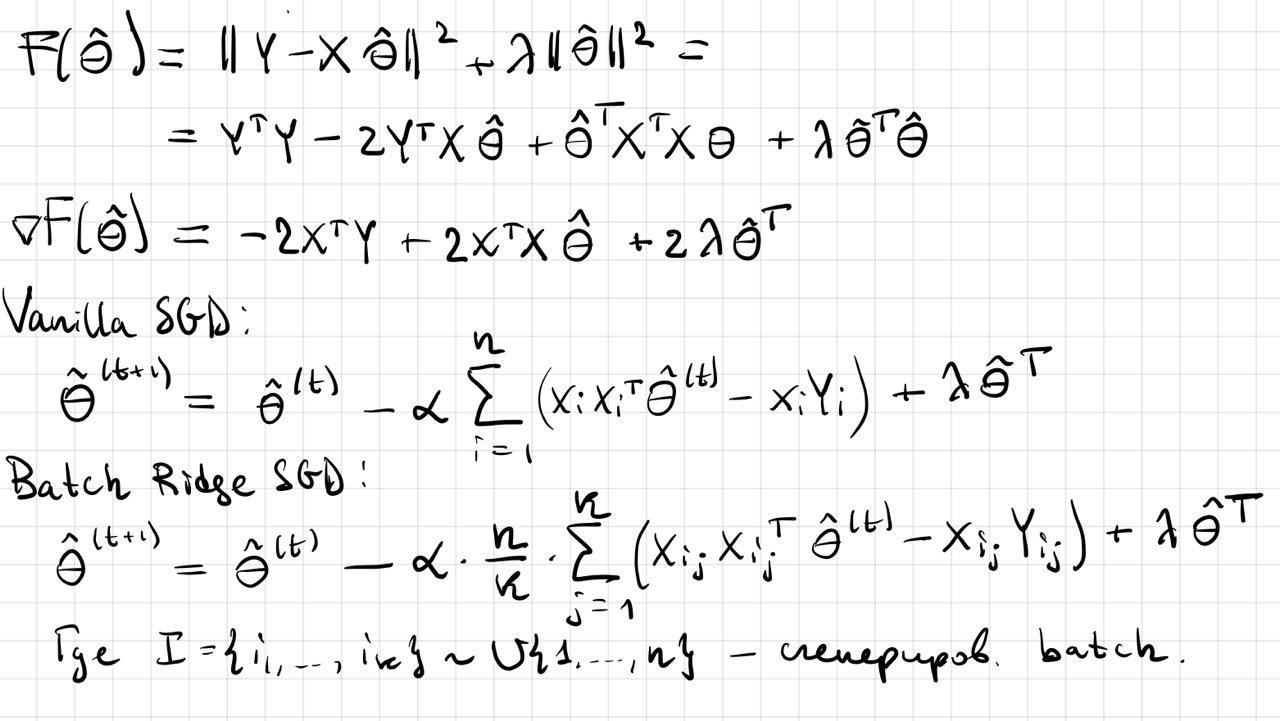

*Примечание:* В последнем слагаемом градиента не тета транспонированное, а просто тета. Аналогично в последних слагаемых SGD и Batch Ridge SGD.

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

*Неформально, ridge-регрессия не дает коэффициентам модели превышать некий порог. Что же будет, если признаки будут разного масштаба? Рассмотрим на примере обучения модели на данных, где есть признаки "длина в миллиметрах" и "длина в сантиметрах". Без Ridge регрессия бы подстроилась и нашла нормирующий коэффициент. Но с Ridge этого не произойдет и по сути два одинаковых по смыслу зависимых признака станут вносить в результат разные веса и портить loss. Для избежания таких проблем используют стандартизацию.*

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

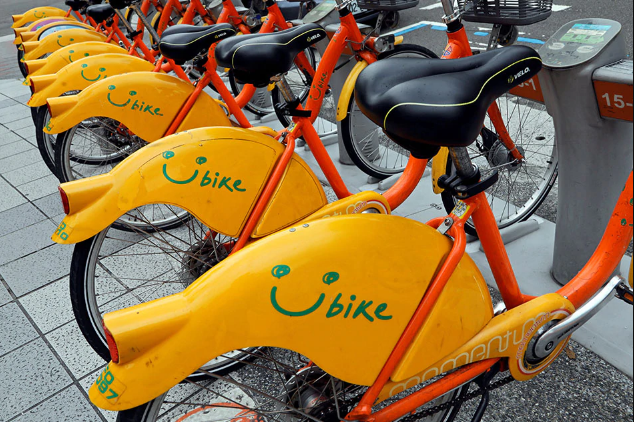

Для начала реализуйте класс для работы с моделью ridge-регрессии. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [177]:
def scale(X):
    return (X - np.mean(X,0)) / np.std(X, 0)

def add_intercept(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

In [240]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X, Y = shuffle(process(df, drop_temp=False), random_state=1337)
scaler.fit(X)

X = scaler.transform(X)


train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [272]:
def rmse_loss(Y, Y_pred):
    return np.sqrt(metrics.mean_squared_error(Y, Y_pred))

class RidgeRegression:
    def __init__(self, input_size, lambd=0.1, fit_intercept=True):
        """
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        """
        self.lambda_ = lambd
        self.fit_intercept = fit_intercept
        
        self.weights_ = np.random.rand(input_size + fit_intercept, 1)
    
    def grad(self, X, Y):
        return X.T @ (X @ self.weights_ - Y) + self.lambda_ * self.weights_
        
    def fit(self, X, Y, epochs=200, learning_rate=0.0001, log_freq=100, mute=False):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        X = np.array(X)
        if self.fit_intercept is True:
            X = add_intercept(X)
    
        Y = np.array(Y).reshape(-1, 1)
        n = X.shape[0]
        
        if not mute:
            print(f"Init Loss: {rmse_loss(Y, X @ self.weights_)}")
        
        hist = np.zeros((epochs, 1))
        
        for ep in range(epochs):
            self.weights_ -= (learning_rate / n) * self.grad(X, Y)
            hist[ep] = rmse_loss(Y, X @ self.weights_)
        
            if ep % log_freq == 0 and not mute:
                print(f"Epoch: {ep}/? | Loss: {hist[ep]}")
    
        return hist
    
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        
        if self.fit_intercept is True:
            X = add_intercept(X)
        
        return X @ self.weights_


Выполните необходимые преобразования признаков. Не забудьте, что обучить преобразования нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее.

Init Loss: 4967.940968216668
Epoch: 0/? | Loss: [4723.84377429]
Epoch: 100/? | Loss: [1330.55550808]
Epoch: 200/? | Loss: [1330.1541618]
Epoch: 300/? | Loss: [1330.13037304]
Epoch: 400/? | Loss: [1330.11035518]
Epoch: 500/? | Loss: [1330.09299833]
Epoch: 600/? | Loss: [1330.07793689]
Epoch: 700/? | Loss: [1330.0648596]
Epoch: 800/? | Loss: [1330.05349806]
Epoch: 900/? | Loss: [1330.04362071]
Epoch: 1000/? | Loss: [1330.03502772]
Epoch: 1100/? | Loss: [1330.02754663]
Epoch: 1200/? | Loss: [1330.02102858]
Epoch: 1300/? | Loss: [1330.01534501]
Epoch: 1400/? | Loss: [1330.01038488]
Epoch: 1500/? | Loss: [1330.00605227]
Epoch: 1600/? | Loss: [1330.00226427]
Epoch: 1700/? | Loss: [1329.99894921]
Epoch: 1800/? | Loss: [1329.99604512]
Epoch: 1900/? | Loss: [1329.99349836]
Epoch: 2000/? | Loss: [1329.99126254]
Epoch: 2100/? | Loss: [1329.98929748]
Epoch: 2200/? | Loss: [1329.98756837]
Epoch: 2300/? | Loss: [1329.98604505]
Epoch: 2400/? | Loss: [1329.98470138]
Epoch: 2500/? | Loss: [1329.9835146

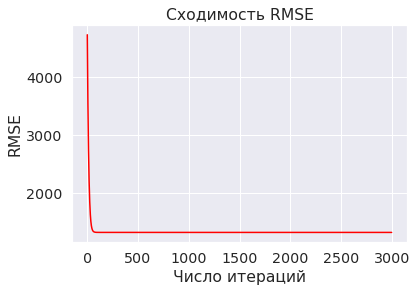

In [241]:
x_train = scale(np.array(x_train))
model = RidgeRegression(x_train.shape[1], lambd=0.5, fit_intercept=True)

hist = model.fit(x_train, y_train, epochs=3000, learning_rate=0.05, log_freq=100)
print("Result Loss: ", hist[-1])

plt.plot(range(len(hist)), hist, 'r')
plt.title("Сходимость RMSE")
plt.xlabel("Число итераций")
plt.ylabel("RMSE")
plt.show()

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе.

In [273]:
grid = np.logspace(np.log10(0.1), np.log10(1), num=100)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. 

In [250]:
x_test = scale(np.array(x_test))
y_test = np.array(y_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)

In [274]:
from sklearn import metrics

hist_train = np.zeros((grid.shape[0], 3))
hist_test = np.zeros((grid.shape[0], 3))

for (i, lambd) in enumerate(grid):
    model = RidgeRegression(x_train.shape[1], lambd=lambd, fit_intercept=True)
    _ = model.fit(x_train, y_train, epochs=3000, learning_rate=0.05, log_freq=1000000000, mute=True)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    hist_train[i][0] = rmse_loss(y_train, train_pred)
    hist_train[i][1] = metrics.mean_absolute_error(y_train, train_pred)
    hist_train[i][2] = metrics.mean_absolute_percentage_error(y_train, train_pred)
    
    hist_test[i][0] = rmse_loss(y_test, test_pred)
    hist_test[i][1] = metrics.mean_absolute_error(y_test, test_pred)
    hist_test[i][2] = metrics.mean_absolute_percentage_error(y_test, test_pred)
    
    # print(f"{lambd} -- TRAIN -- RMSE: {hist_train[i][0]} | MAE: {hist_train[i][1]} | MAPE: {hist_train[i][2]}")
    # print(f"{lambd} -- TEST  -- RMSE: {hist_test[i][0]} | MAE: {hist_test[i][1]} | MAPE: {hist_test[i][2]}")
    # print("--------------------------------------------------------------------")

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

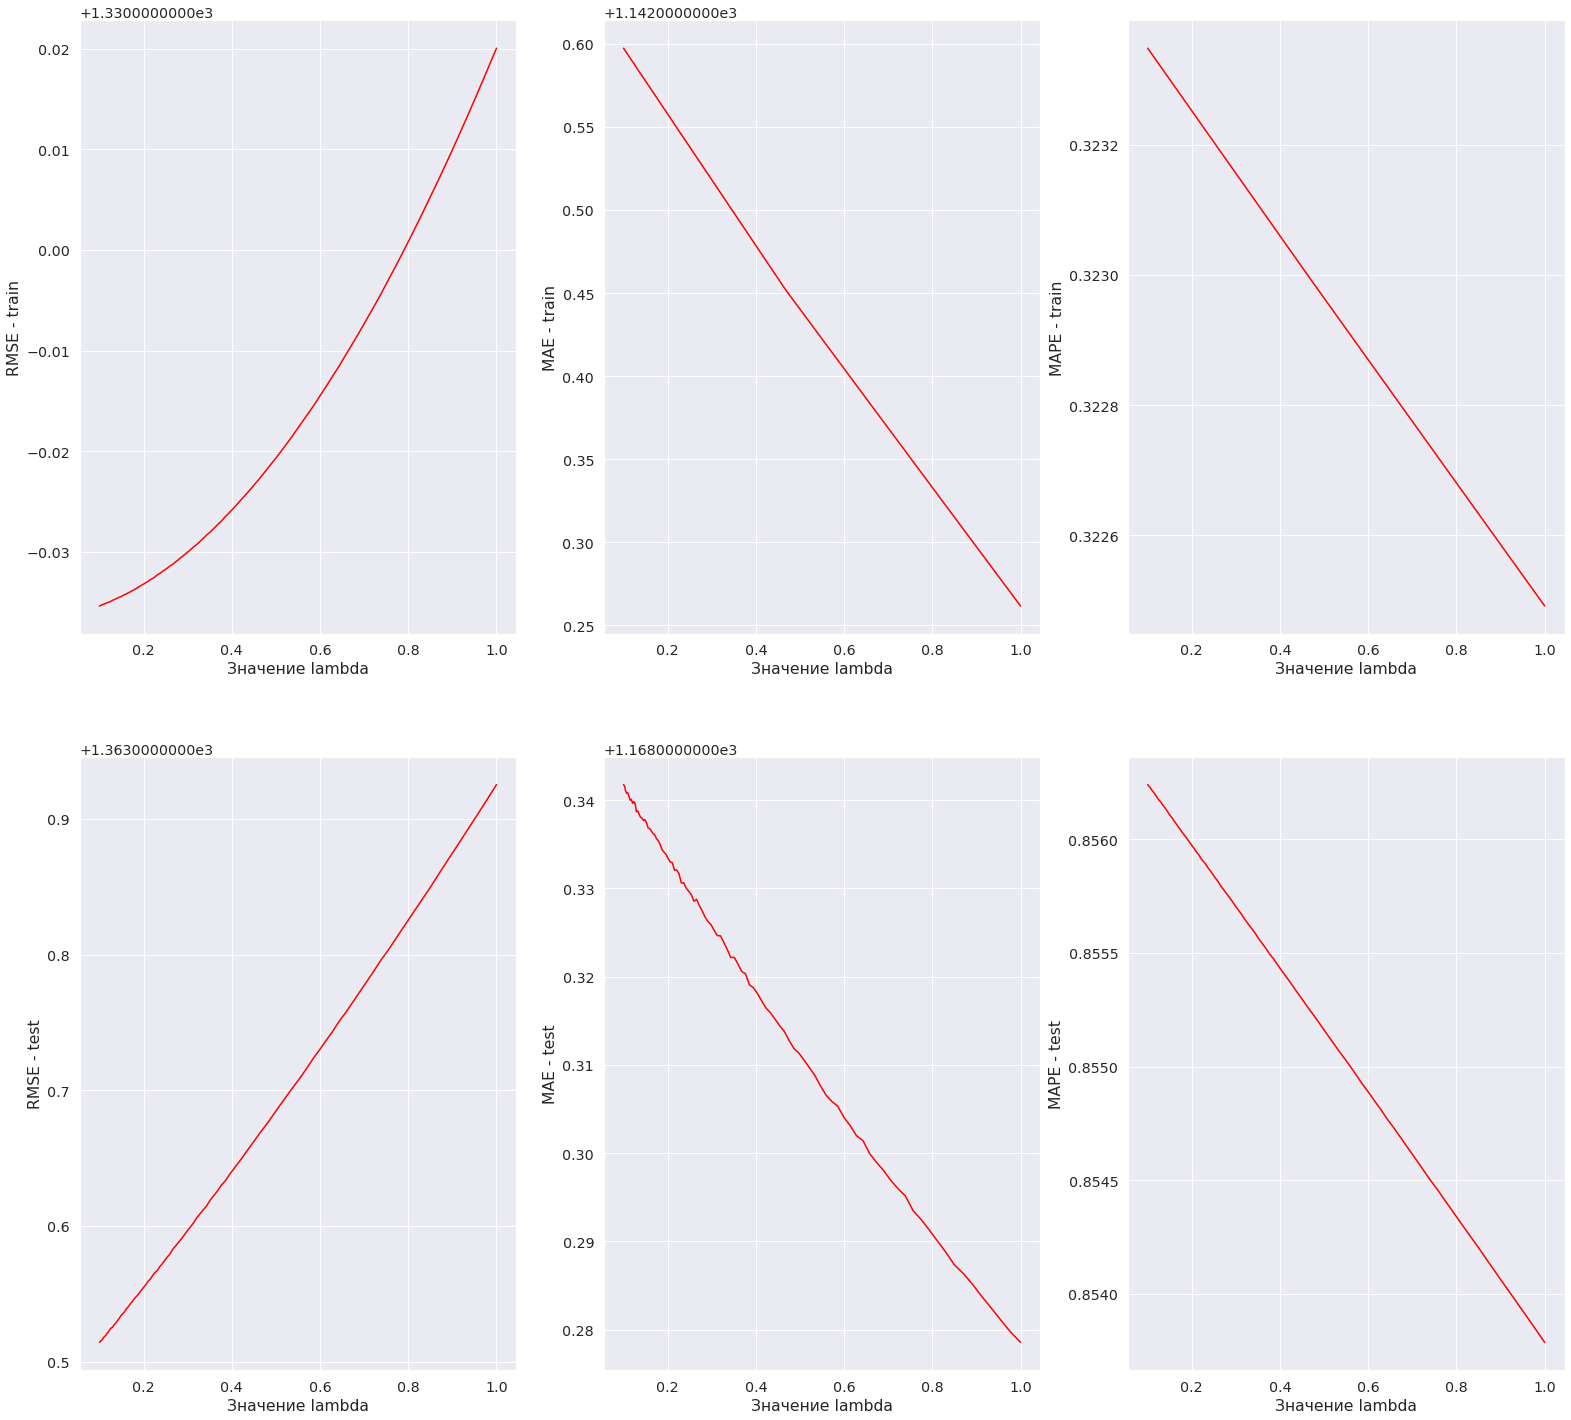

In [275]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.subplots_adjust(right=1.5, top=2)

labels = ["RMSE", "MAE", "MAPE"]
mode = ["train", "test"]

for i in range(3):
    axes[0][i].plot(grid, hist_train[:,i], 'r')
    axes[0][i].set_xlabel("Значение lambda")
    axes[0][i].set_ylabel(f"{labels[i]} - {mode[0]}")

for i in range(3):
    axes[1][i].plot(grid, hist_test[:,i], 'r')
    axes[1][i].set_xlabel("Значение lambda")
    axes[1][i].set_ylabel(f"{labels[i]} - {mode[1]}")
    
plt.show()

Не стоит верить этим графикам - ошибки менялись на тысячные доли при изменении лямбд, но, для протокола, опишем графики. MAE и MAPE ведут себя одинаково линейно для train и test, причем с ростом лямбды скор уменьшается (меньше - лучше). Квадратичная ошибка, наоборот, возрастает и в случае test ведет себя линейно, а в случае train - квадратично.

Опять-таки повторяю, выбор лямбды влияет очень, очень, очень незначительно конкретно в данном эксперименте.

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Для наглядности можно попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Раз такие дела, возьмем любую лямбду:

In [278]:
x_val = scale(np.array(x_val))
y_val = np.array(y_val).reshape(-1, 1)

model = RidgeRegression(x_train.shape[1], lambd=grid[np.random.randint(0, 9)], fit_intercept=True)
_ = model.fit(x_train, y_train, epochs=3000, learning_rate=0.05, log_freq=1000000000, mute=True)

print(metrics.mean_absolute_error(y_val, model.predict(x_val)))

1179.3534113365379


- Оказалось, что выбор гиперпараметра не сильно влияет на результат. Возможно, какие-то беды с обработкой данных.
- Loss сходится быстро и потом на следующих эпохах не меняется, видимо, такой вот устойчивый экстремум.
- SGD - круто

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

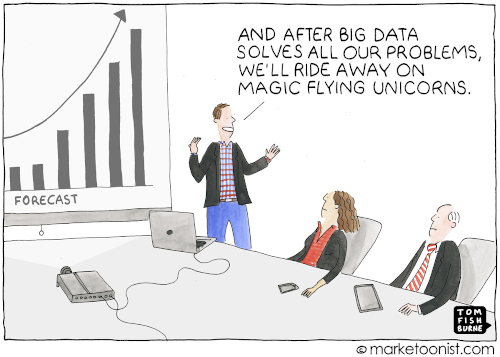

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Реализуйте процедуру mini-batch стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча обычно берут кратно степени двойки, например, 128 или 256.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.